Create a figure indicating qualitatively how the modelling uncertainty can affect the ida curve

In [22]:
import json
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import lognorm

In [24]:
ida_results_folder = Path("E:/analysis_out/3s_cbf_dc2_41/ida_SA")
gravity = 9810  # mm/s2

# load the collapse fragility
with open(ida_results_folder / "collapse_fragility.json", "r") as file:
    collapse_fragility = json.load(file)

# load ida splines
spline_folder = ida_results_folder / "drift/ida_splines"
record_spline_files = [f for f in os.listdir(spline_folder) if "record" in f]

splines = {}
for f in record_spline_files:
    record_num = int(f.split("_")[1])
    splines[record_num] = np.loadtxt(spline_folder / f, delimiter=",")

# extend the ida to 20% drift
for num in splines.keys():
    splines[num] = np.vstack([splines[num], [0.2, splines[num][-1,1]]])

# # calculate the values for the distribution
# ims = np.linspace(0, 6, num=200)
# ims[0] = 0.001
# pdf = lognorm.pdf(ims, s=collapse_fragility["dispersion"], scale=collapse_fragility["median"]/gravity)
# cdf = lognorm.cdf(ims, s=collapse_fragility["dispersion"], scale=collapse_fragility["median"]/gravity)
# theta_c = lognorm.ppf(0.5, s=collapse_fragility["dispersion"], scale=collapse_fragility["median"]/gravity)

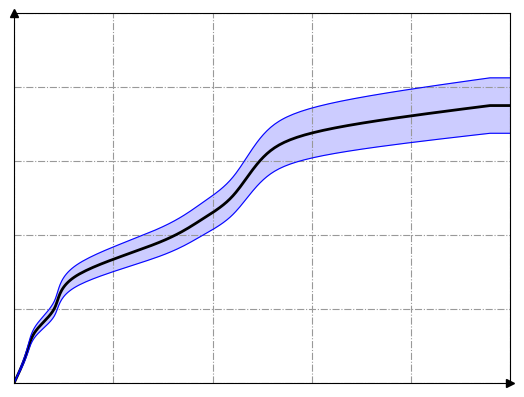

In [40]:
x1_lim = 0.05
y1_lim = 2.5
x2_lim = 10

curve_num = 10

fig = plt.figure()
ax1 = plt.gca()
# ax2 = ax1.twiny()

ax1.plot(1, 0, ">k", transform=ax1.get_yaxis_transform(), clip_on=False)
ax1.plot(0, 1, "^k", transform=ax1.get_xaxis_transform(), clip_on=False)

# get spline
s = splines[curve_num]
upper = s[:,1] * 1.1 / gravity
lower = s[:,1] * 0.9 / gravity

ax1.plot(s[:,0], s[:,1] / gravity, color="k", linewidth=2)
ax1.plot(s[:,0], lower, color="b", linewidth=0.75)
ax1.plot(s[:,0], upper, color="b", linewidth=0.75)
ax1.fill_between(s[:,0], upper, lower, color ="b", alpha=0.2)

ax1.set_xlim(0, x1_lim)
ax1.set_ylim(0, y1_lim)
ax1.grid(visible=True, which="major", linestyle="-.", color="0.6")
ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])
ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False)

# ax2.plot(pdf, ims, color="blue")
# ax2.fill_betweenx(ims, pdf, color="blue", alpha=0.2)
# ax2.set_xlim(x2_lim, 0)
# ax2.xaxis.set_visible(False)